In [19]:
# imports
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [12]:
# define function CL
CL = Class()
# set fiducial cosmology (Planck-2015) paramaters; see Appendix Table 2
# note: small o for omega refers to REDUCED parameter; omega_b = Omega_b*h^2
fiducial_settings = {'omega_b':0.0222,
                   'omega_cdm':0.120,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'output':'mPk,tCl,pCl,lCl',
                   'lensing':'nala'
                    }
# when trying to simulate IDM model set omega_dmeff = 0.120 and omega_cdm = 0; for LCDM vice versa
IDM_settings = {'omega_b':0.0222,
                   'omega_cdm':0,
                   'tau_reio':0.06,
                   'h':0.69,
                   'A_s':2.2e-09,
                   'n_s':0.966,
                   'omega_dmeff':0.120,
                   'm_dmeff':1.0,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'output':'mPk,tCl,pCl,lCl',
                   'lensing':'nintendo'
                    }
CL.set(fiducial_settings)
# set parameters to be varied
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
# run class
CL.compute()
# get fiducial cosmology C_l output
fiducial_cls = CL.raw_cl(2500)
# To check the format of cls
fiducial_cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

float64


array([1.53947546e-10, 7.25161788e-11, 4.10137084e-11, ...,
       1.16089010e-17, 1.15617841e-17, 1.15143297e-17])

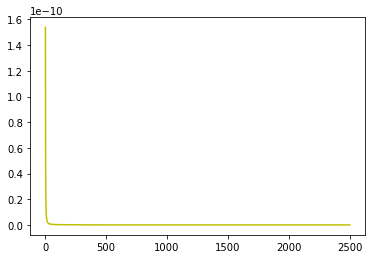

In [13]:
# get the C_l output for fiducial
fiducial_ll = fiducial_cls['ell'][2:]
fiducial_TT = fiducial_cls['tt'][2:]
fiducial_EE = fiducial_cls['ee'][2:]
fiducial_PP = fiducial_cls['pp'][2:]

# use for loop and zip to compute kappa-kappa C_ls
fiducial_kk = []

for x, y in zip(fiducial_ll, fiducial_PP):
    fiducial_kk.append(1/4*y*(x-1)*x*(x+1)*(x+2))

len(fiducial_ll)
print(fiducial_TT.dtype)
plt.plot(fiducial_ll, fiducial_TT, 'y-')
# plt.show()

fiducial_TT

In [14]:
# compute C_l TT for m_ncdm = 0.07
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1.0,
       'm_ncdm':0.07,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.compute()
ncdm1_cls = CL.raw_cl(2500)
ncdm1_ll = ncdm1_cls['ell'][2:]
ncdm1_TT = ncdm1_cls['tt'][2:]
# compute residual for m_ncdm = 0.07
residual_ncdm1 = np.subtract(ncdm1_TT, fiducial_TT)
residual_percentage_ncdm1 = 100*np.divide(residual_ncdm1, fiducial_TT)

# compute C_l EE for m_ncdm = 0.065
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1.0,
       'm_ncdm':0.065,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.compute()
ncdm2_cls = CL.raw_cl(2500)
ncdm2_ll = ncdm2_cls['ell'][2:]
ncdm2_EE = ncdm2_cls['ee'][2:]
# compute residual for m_ncdm = 0.065
residual_ncdm2 = np.subtract(ncdm2_EE, fiducial_EE)
residual_percentage_ncdm2 = 100*np.divide(residual_ncdm2, fiducial_EE)

# compute C_l kappa-kappa for m_ncdm = 0.08
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1.0,
       'm_ncdm':0.08,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.compute()
ncdm3_cls = CL.raw_cl(2500)
ncdm3_ll = ncdm3_cls['ell'][2:]
ncdm3_PP = ncdm3_cls['pp'][2:]
# use for loop and zip to compute kappa-kappa C_ls
ncdm3_kk = []
for x, y in zip(ncdm3_ll, ncdm3_PP):
    ncdm3_kk.append(1/4*y*(x-1)*x*(x+1)*(x+2))
# compute residual for m_ncdm = 0.08
residual_ncdm3 = np.subtract(ncdm3_kk, fiducial_kk)
residual_percentage_ncdm3 = 100*np.divide(residual_ncdm3, fiducial_kk)

In [15]:
# compute C_l for N_eff (paper notation) = N_ur = 3.06
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.06
       })
CL.compute()
Nur1_cls = CL.raw_cl(2500)
Nur1_ll = Nur1_cls['ell'][2:]
Nur1_TT = Nur1_cls['tt'][2:]
# compute residual for N_ur = 3.06
residual_Nur1 = np.subtract(Nur1_TT, fiducial_TT)
residual_percentage_Nur1 = 100*np.divide(residual_Nur1, fiducial_TT)

# compute C_l for N_eff (paper notation) = N_ur = 3.05
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.05
       })
CL.compute()
Nur2_cls = CL.raw_cl(2500)
Nur2_ll = Nur2_cls['ell'][2:]
Nur2_EE = Nur2_cls['ee'][2:]
# compute residual for N_ur = 3.05
residual_Nur2 = np.subtract(Nur2_EE, fiducial_EE)
residual_percentage_Nur2 = 100*np.divide(residual_Nur2, fiducial_EE)

# compute C_l for N_eff (paper notation) = N_ur = 3.096
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.096
       })
CL.compute()
Nur3_cls = CL.raw_cl(2500)
Nur3_ll = Nur3_cls['ell'][2:]
Nur3_PP = Nur3_cls['pp'][2:]
# use for loop and zip to compute kappa-kappa C_ls
Nur3_kk = []
for x, y in zip(Nur3_ll, Nur3_PP):
    Nur3_kk.append(1/4*y*(x-1)*x*(x+1)*(x+2))
# compute residual for N_ur = 3.096
residual_Nur3 = np.subtract(Nur3_kk, fiducial_kk)
residual_percentage_Nur3 = 100*np.divide(residual_Nur3, fiducial_kk)

In [16]:
# compute C_l for p_ann = annihilation = 1.4e-07
# With the input suntax of class <= 2.9 we used: annihilation = 1.e-5 m^3/s/Kg
# With the new syntax this is equivalent to DM_annihilation_efficiency = 1.11e-22 m^3/s/J
# so compute C_l for p_ann = DM_annihilation_efficiency = 1.556e-24
# (the ratio is a factor (c/[1 m/s])**2 = 9.e16)
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':1.556e-24,
       'N_ur':3.046
       })
CL.compute()
pann1_cls = CL.raw_cl(2500)
pann1_ll = pann1_cls['ell'][2:]
pann1_TT = pann1_cls['tt'][2:]
# compute residual for DM_annihilation_efficiency = 1.556e-24
residual_pann1 = np.subtract(pann1_TT, fiducial_TT)
residual_percentage_pann1 = 100*np.divide(residual_pann1,fiducial_TT)

# compute C_l for p_ann = annihilation = 1.4e-07
# so DM_annihilation_efficiency = 1.556e-24
CL.empty()
CL.set(fiducial_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':1.556e-24,
       'N_ur':3.046
       })
CL.compute()
pann2_cls = CL.raw_cl(2500)
pann2_ll = pann2_cls['ell'][2:]
pann2_EE = pann2_cls['ee'][2:]
# compute residual for DM_annihilation_efficiency = 1.556e-24
residual_pann2 = np.subtract(pann2_EE, fiducial_EE)
residual_percentage_pann2 = 100*np.divide(residual_pann2,fiducial_EE)

In [17]:
# compute C_l for sigma_p (paper notation) = sigma_dmeff = 2.1e-26
CL.empty()
CL.set(IDM_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.set({'sigma_dmeff':2.1e-26})
CL.compute()
dmeff1_cls = CL.raw_cl(2500)
dmeff1_ll = dmeff1_cls['ell'][2:]
dmeff1_TT = dmeff1_cls['tt'][2:]
# compute residual for sigma_dmeff = 2.1e-26
residual_dmeff1 = np.subtract(dmeff1_TT, fiducial_TT)
residual_percentage_dmeff1 = 100*np.divide(residual_dmeff1,fiducial_TT)

# compute C_l for sigma_p (paper notation) = sigma_dmeff = 2.0e-26
CL.empty()
CL.set(IDM_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.set({'sigma_dmeff':2.0e-26})
CL.compute()
dmeff2_cls = CL.raw_cl(2500)
dmeff2_ll = dmeff2_cls['ell'][2:]
dmeff2_EE = dmeff2_cls['ee'][2:]
# compute residual for sigma_dmeff = 2.0e-26
residual_dmeff2 = np.subtract(dmeff2_EE, fiducial_EE)
residual_percentage_dmeff2 = 100*np.divide(residual_dmeff2,fiducial_EE)

# compute C_l for sigma_p (paper notation) = sigma_dmeff = 8.8e-27
CL.empty()
CL.set(IDM_settings)
CL.set({'N_ncdm':1,
       'm_ncdm':0.06,
       'DM_annihilation_efficiency':0,
       'N_ur':3.046
       })
CL.set({'sigma_dmeff':8.8e-27})
CL.compute()
dmeff3_cls = CL.raw_cl(2500)
dmeff3_ll = dmeff3_cls['ell'][2:]
dmeff3_PP = dmeff3_cls['pp'][2:]
# use for loop and zip to compute kappa-kappa C_ls
dmeff3_kk = []
for x, y in zip(dmeff3_ll, dmeff3_PP):
    dmeff3_kk.append(1/4*y*(x-1)*x*(x+1)*(x+2))
# compute residual for sigma_dmeff = 8.8e-27
residual_dmeff3 = np.subtract(dmeff3_kk, fiducial_kk)
residual_percentage_dmeff3 = 100*np.divide(residual_dmeff3,fiducial_kk)

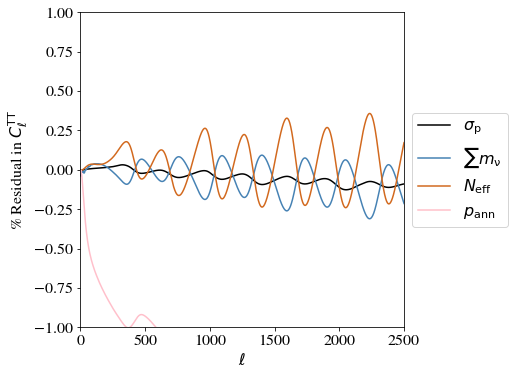

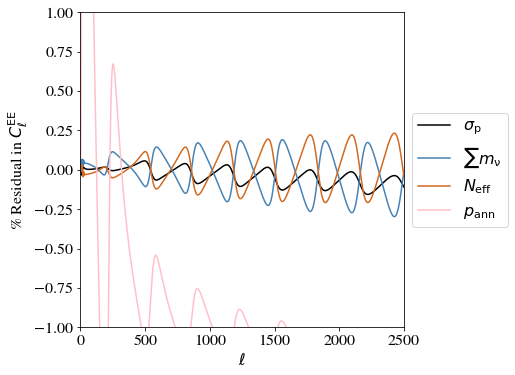

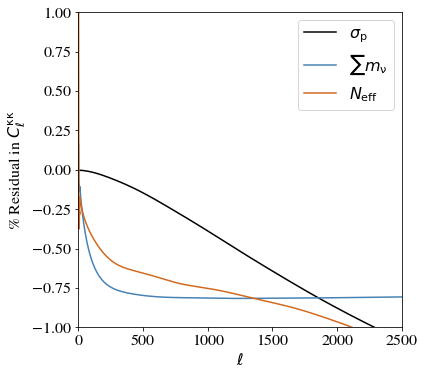

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [20]:
# fonts and sizes
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [5.8,5.8]

# plot C_l_TT
plt.figure(1)
plt.xlim([0,2500])
plt.ylim([-1,1])
plt.xlabel(r'$\ell$')
plt.ylabel(r'% Residual in $C_\ell^\mathrm{TT}$')
plt.plot(dmeff1_ll, residual_percentage_dmeff1, color = 'black', linestyle = '-', label = r'$\sigma_\mathrm{p}$')
plt.plot(ncdm1_ll, residual_percentage_ncdm1, color = 'steelblue', linestyle = '-', label = r'$\sum m_\mathrm{\nu}$')
plt.plot(Nur1_ll, residual_percentage_Nur1, color = 'chocolate', linestyle = '-', label = r'$N_\mathrm{eff}$')
plt.plot(pann1_ll, residual_percentage_pann1, color = 'pink', linestyle = '-', label = r'$p_\mathrm{ann}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('Cltt.png')

# plot C_l_EE
plt.figure(2)
plt.xlim([0,2500])
plt.ylim([-1,1])
plt.xlabel(r'$\ell$')
plt.ylabel(r'% Residual in $C_\ell^\mathrm{EE}$')
plt.plot(dmeff2_ll, residual_percentage_dmeff2, color = 'black', linestyle = '-', label = r'$\sigma_\mathrm{p}$')
plt.plot(ncdm2_ll, residual_percentage_ncdm2, color = 'steelblue', linestyle = '-', label = r'$\sum m_\mathrm{\nu}$')
plt.plot(Nur2_ll, residual_percentage_Nur2, color = 'chocolate', linestyle = '-', label = r'$N_\mathrm{eff}$')
plt.plot(pann2_ll, residual_percentage_pann2, color = 'pink', linestyle = '-', label = r'$p_\mathrm{ann}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('Clee.png')

# plot C_l_kk
plt.figure(3)
plt.xlim([0,2500])
plt.ylim([-1,1])
plt.xlabel(r'$\ell$')
plt.ylabel(r'% Residual in $C_\ell^\mathrm{\kappa\kappa}$')
plt.plot(dmeff3_ll, residual_percentage_dmeff3, color = 'black', linestyle = '-', label = r'$\sigma_\mathrm{p}$')
plt.plot(ncdm3_ll, residual_percentage_ncdm3, color = 'steelblue', linestyle = '-', label = r'$\sum m_\mathrm{\nu}$')
plt.plot(Nur3_ll, residual_percentage_Nur3, color = 'chocolate', linestyle = '-', label = r'$N_\mathrm{eff}$')
plt.legend()
#plt.savefig('Clkk.png')